In [18]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [8]:
# Set up directories
current_dir = os.getcwd()
child_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(child_dir, os.pardir))
grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

csv_file_path = os.path.join(grandparent_dir, 'DataSet', 'cheating_features_dataset.csv')
df = pd.read_csv(csv_file_path)

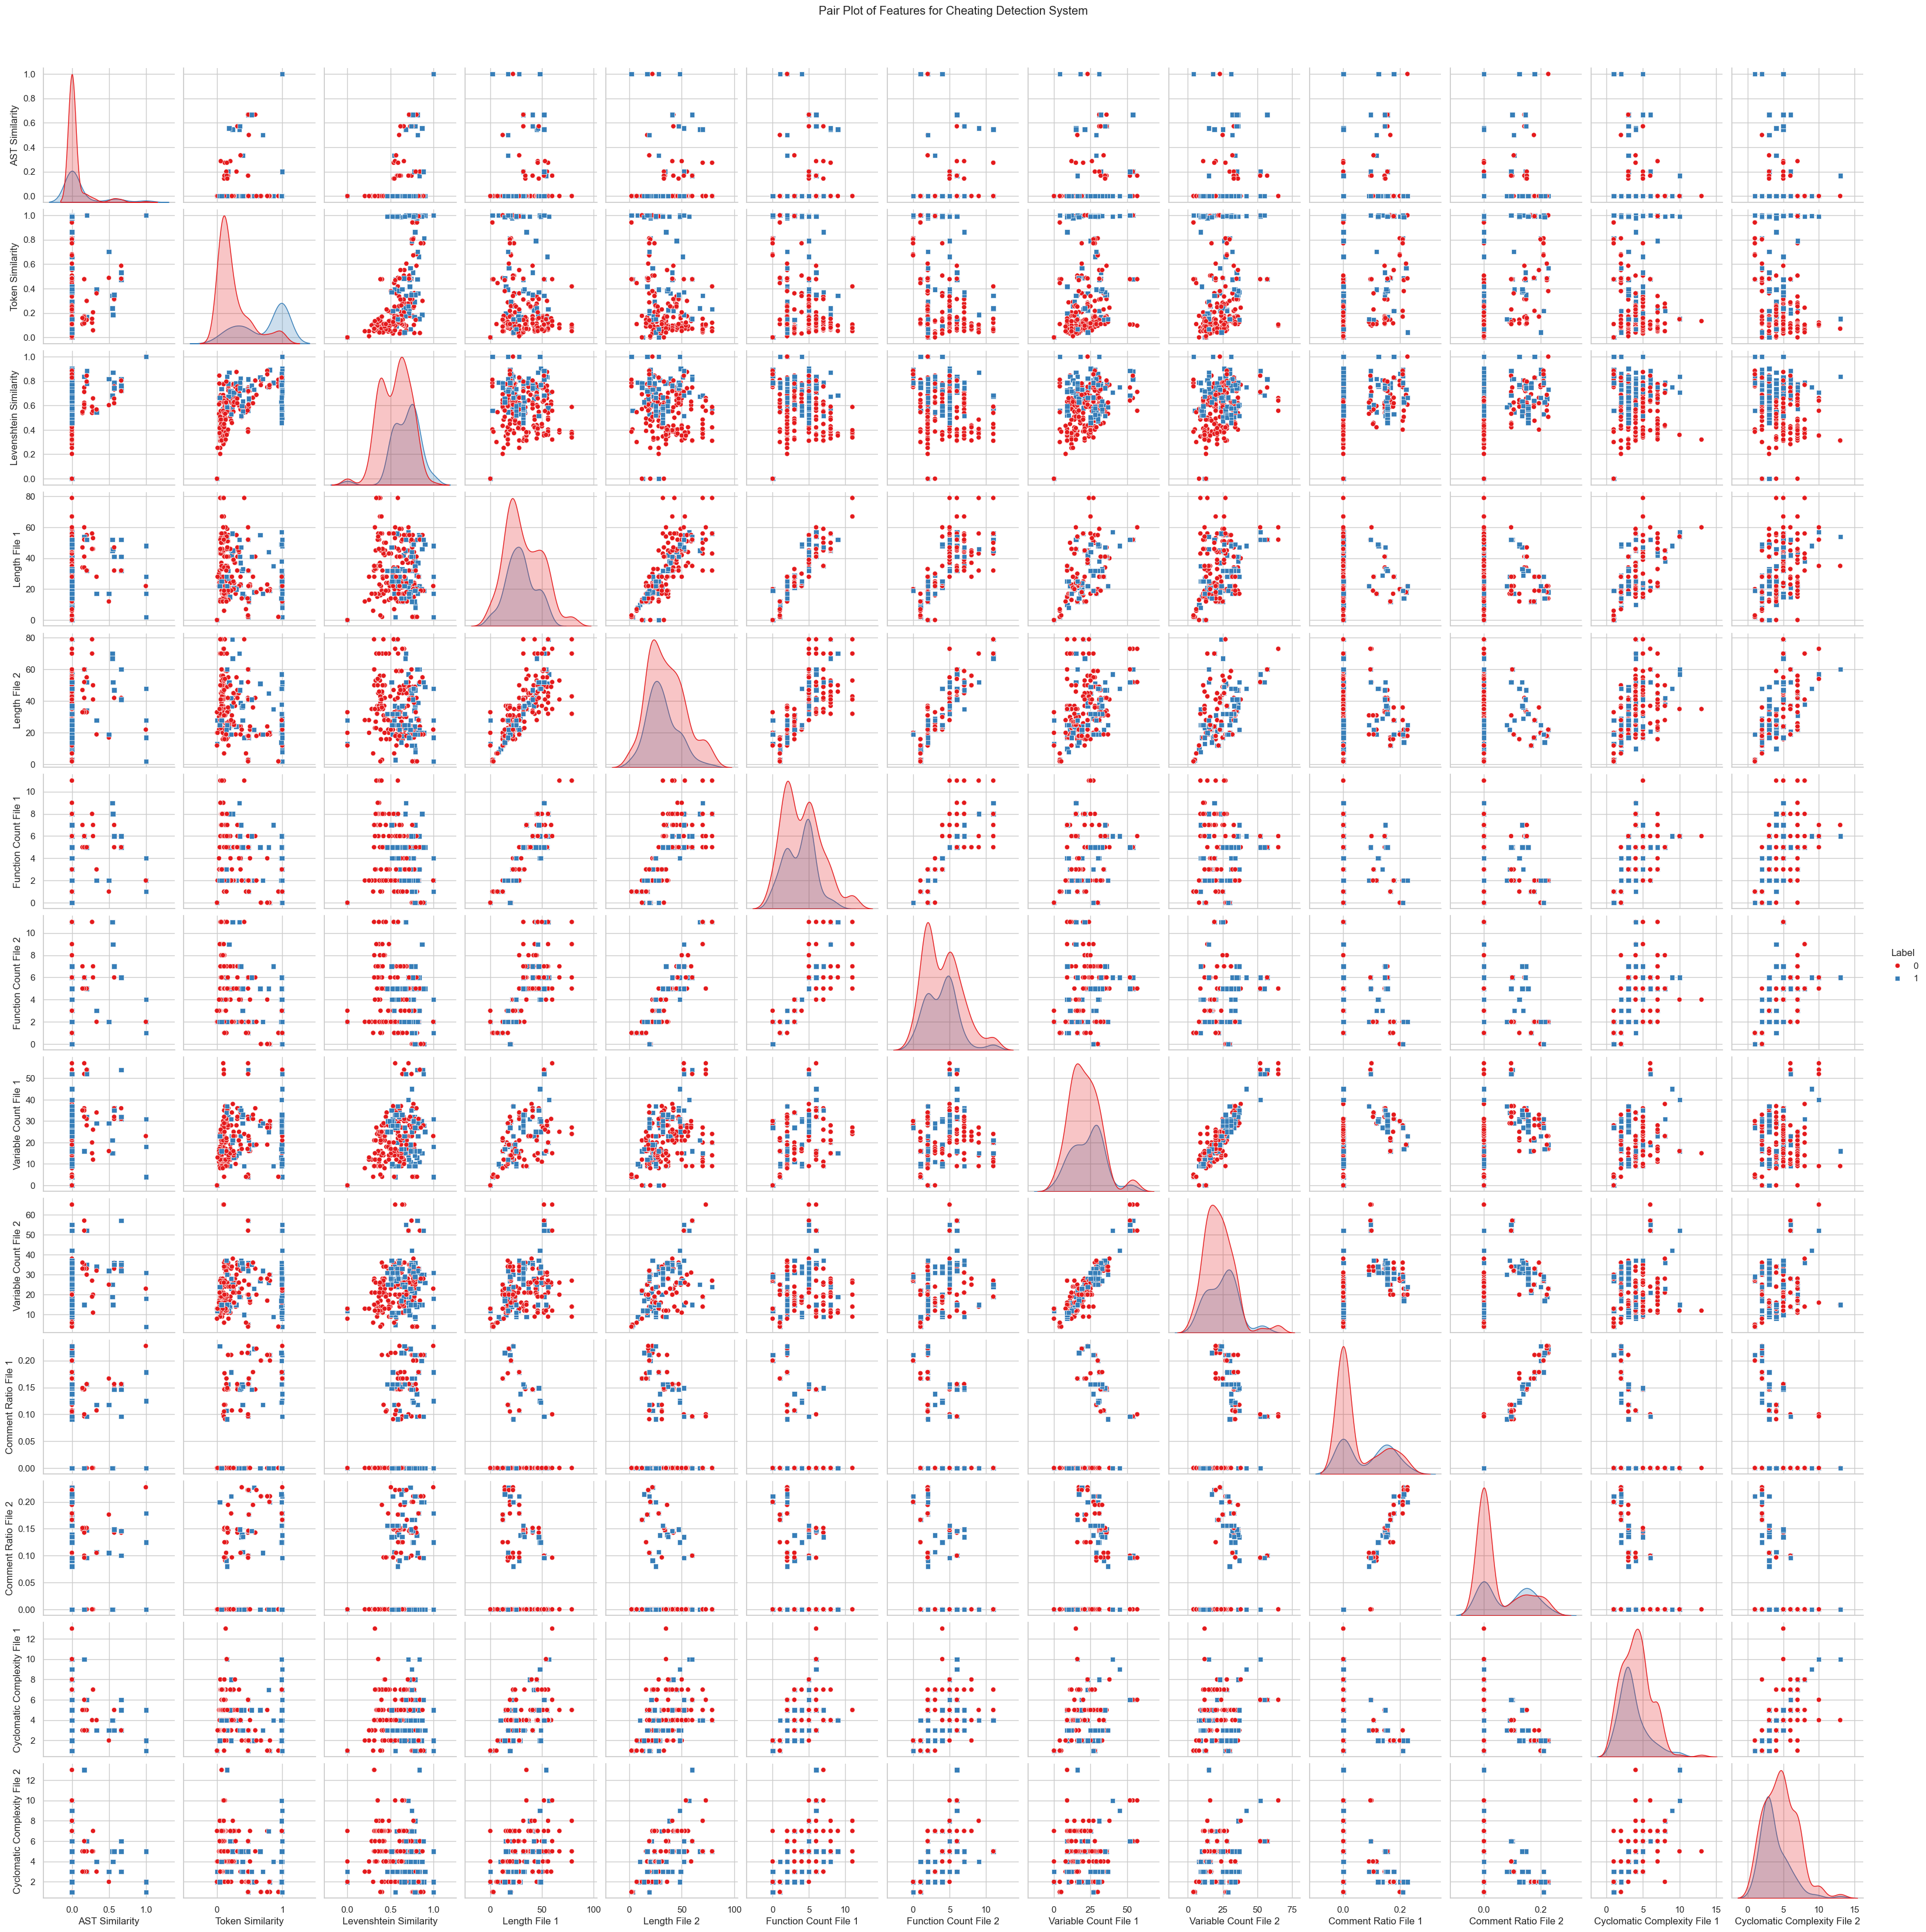

In [11]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pair plot
pair_plot = sns.pairplot(df, hue="Label", markers=["o", "s"], diag_kind="kde", palette="Set1")
pair_plot.fig.suptitle("Pair Plot of Features for Cheating Detection System", y=1.02)

# Save the plot as a PDF
plt.savefig('cheating_detection_plot.pdf', format='pdf')

# Show the plot
plt.show()

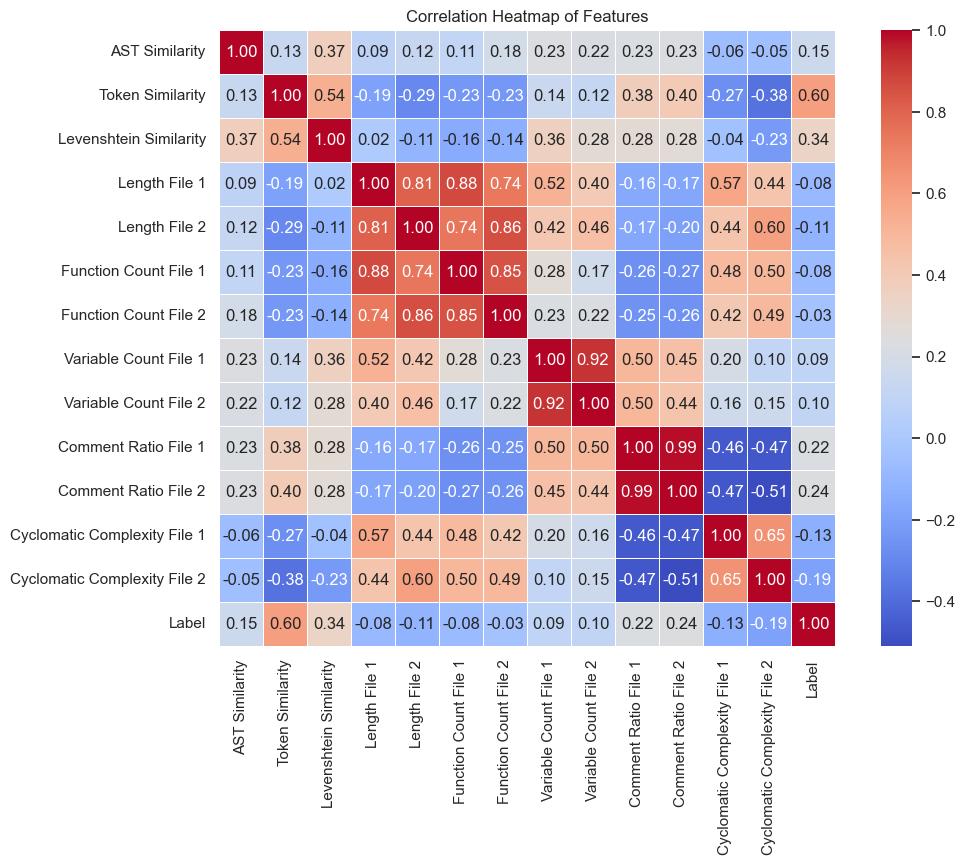

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Features')

# Save the plot as a PDF
plt.savefig('correlation_heatmap.pdf', format='pdf')

# Show the plot
plt.show()

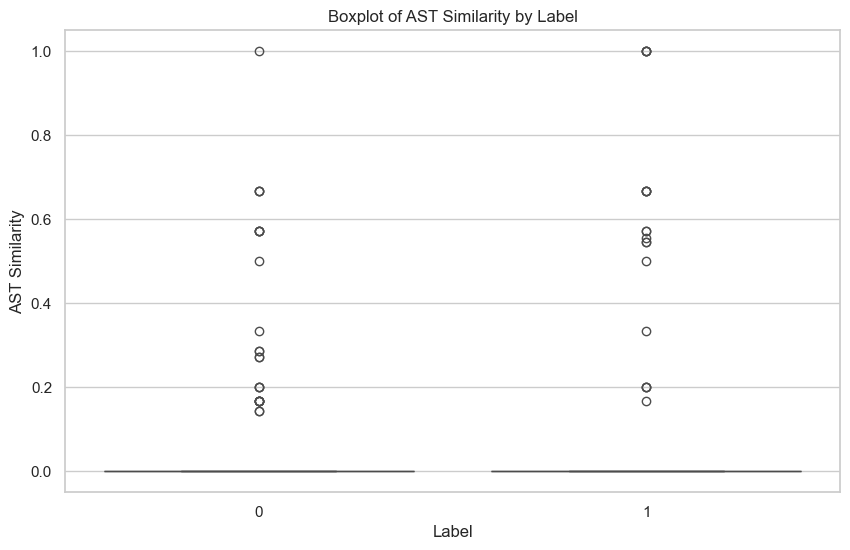

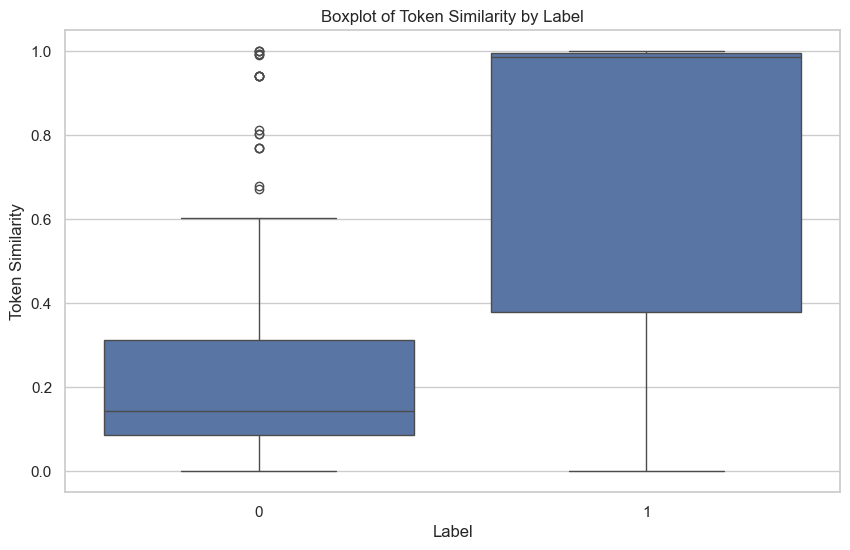

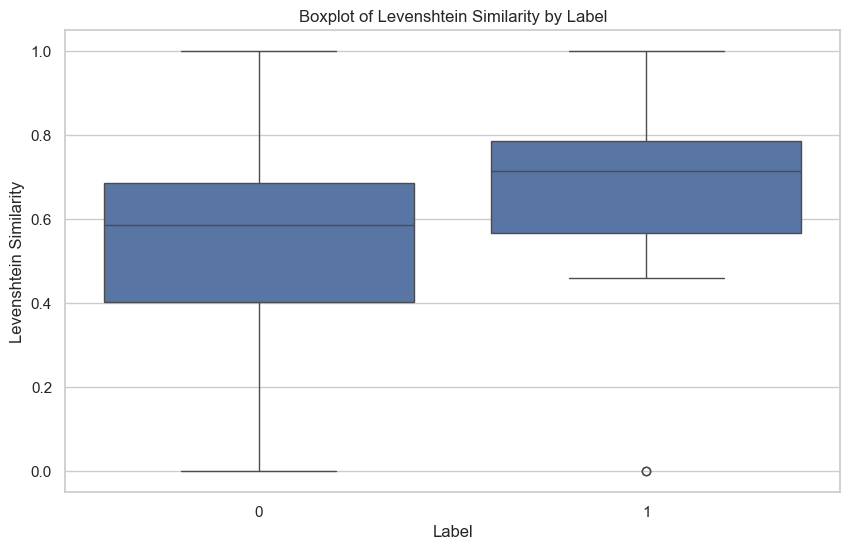

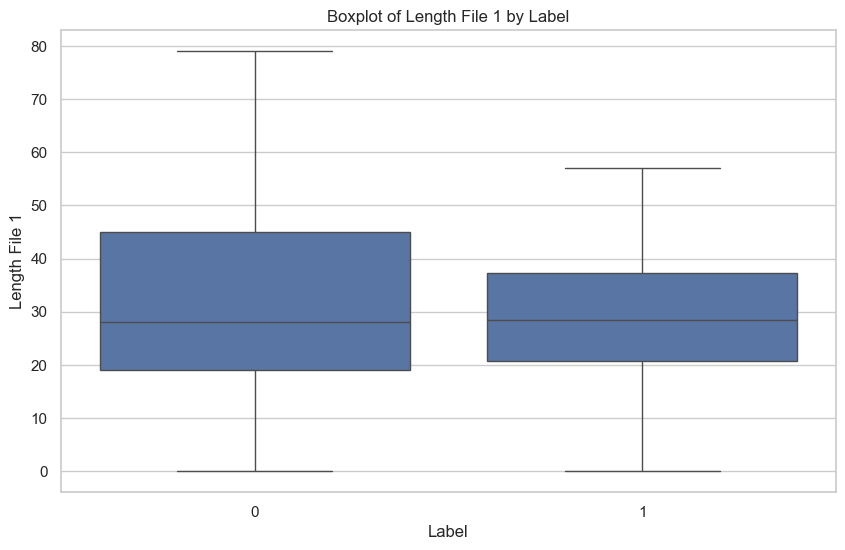

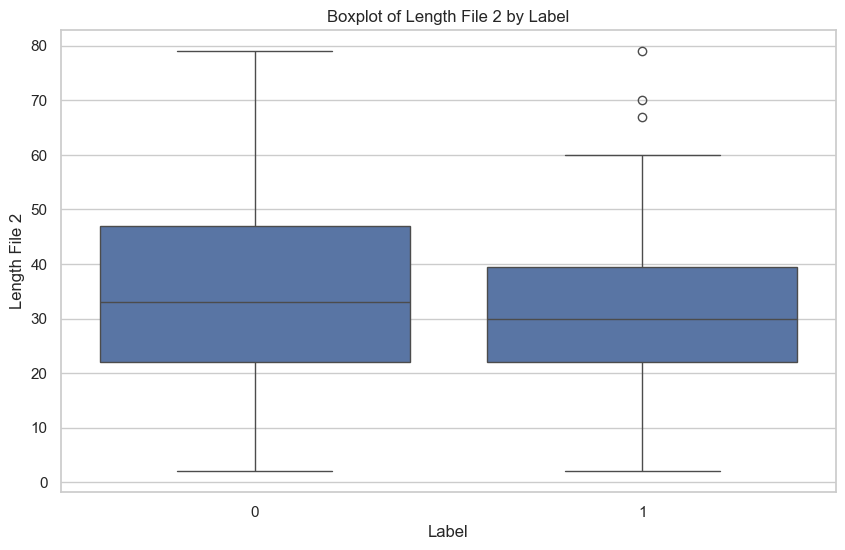

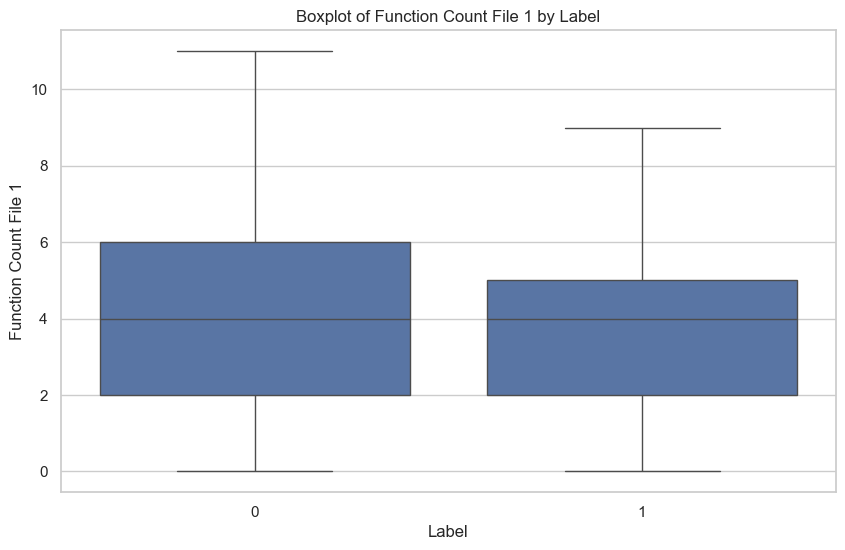

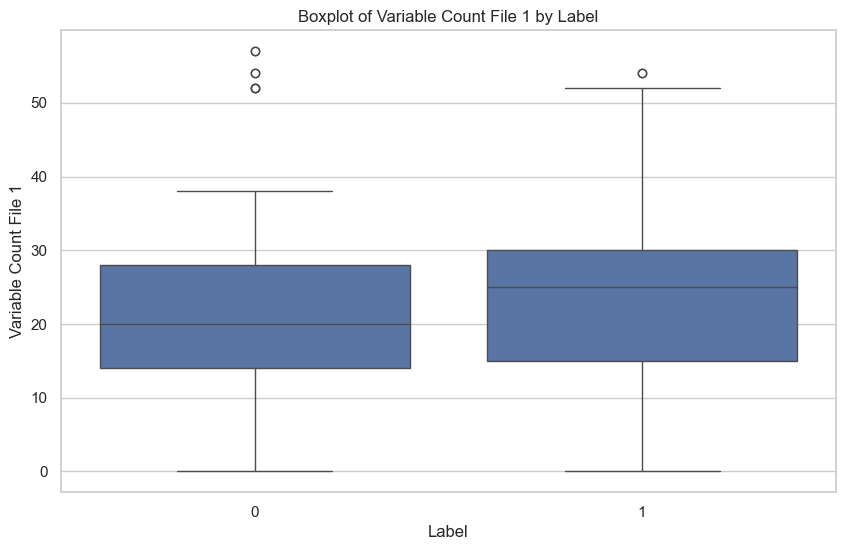

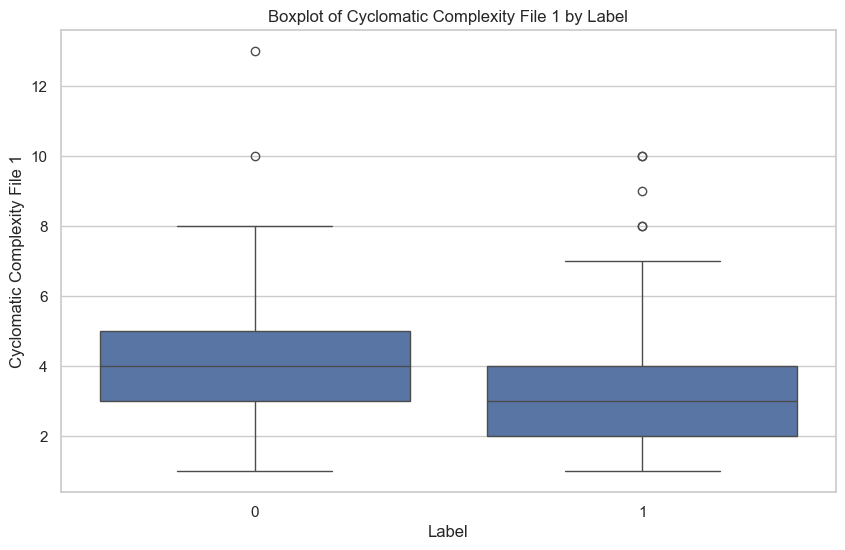

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for each feature with respect to the label
features = ['AST Similarity', 'Token Similarity', 'Levenshtein Similarity', 
            'Length File 1', 'Length File 2', 'Function Count File 1', 
            'Variable Count File 1', 'Cyclomatic Complexity File 1']

# Plot boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    
    # Save the plot as a PDF
    plt.savefig(f'{feature}_boxplot.pdf', format='pdf')
    
    # Show the plot
    plt.show()


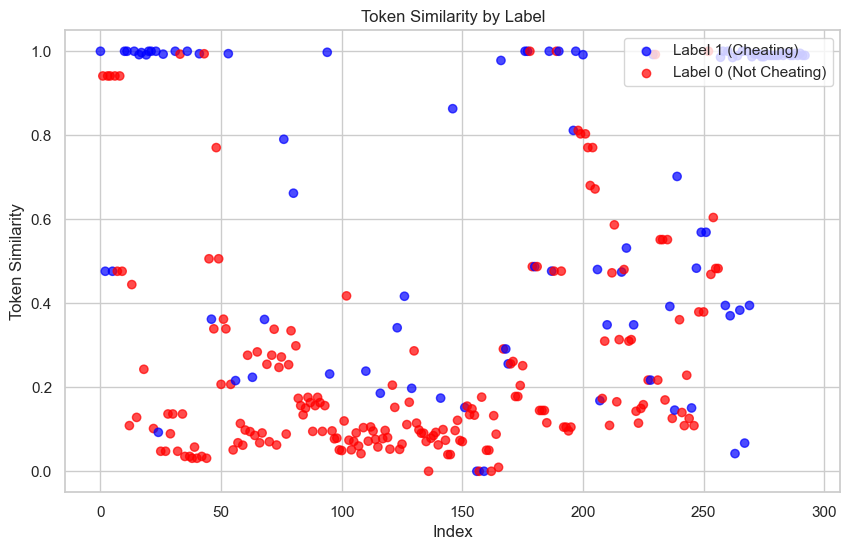

In [16]:
# Set colors based on the label
colors = df['Label'].map({1: 'blue', 0: 'red'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Token Similarity'], c=colors, alpha=0.7)

# Set titles and labels
plt.title('Token Similarity by Label')
plt.xlabel('Index')
plt.ylabel('Token Similarity')

# Add a legend
plt.scatter([], [], c='blue', label='Label 1 (Cheating)', alpha=0.7)
plt.scatter([], [], c='red', label='Label 0 (Not Cheating)', alpha=0.7)
plt.legend(loc='upper right')

# Save the plot as a PDF
plt.savefig('token_similarity_plot.pdf', format='pdf')

# Show the plot
plt.show()

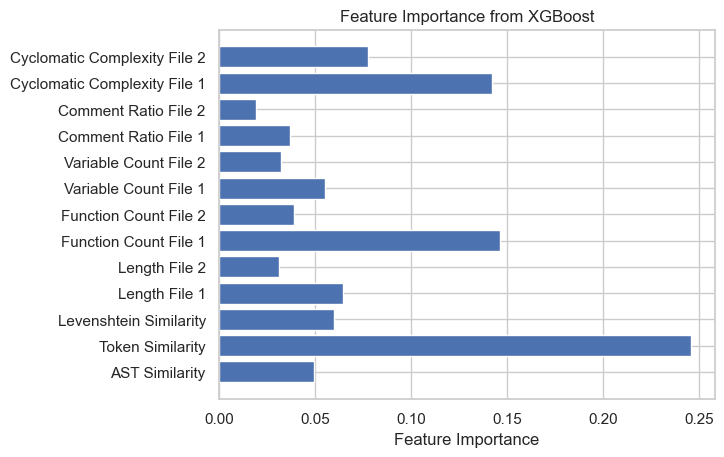

In [26]:
# Prepare data
X = df.drop(columns=['Label'])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Plot feature importances
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

In [21]:
# Calculate correlations
correlation = df.corr()
label_correlation = correlation['Label'].sort_values(ascending=False)
print(label_correlation)

Label                           1.000000
Token Similarity                0.602586
Levenshtein Similarity          0.336851
Comment Ratio File 2            0.235307
Comment Ratio File 1            0.222671
AST Similarity                  0.154237
Variable Count File 2           0.102334
Variable Count File 1           0.093459
Function Count File 2          -0.032320
Function Count File 1          -0.075804
Length File 1                  -0.083170
Length File 2                  -0.109015
Cyclomatic Complexity File 1   -0.129233
Cyclomatic Complexity File 2   -0.191628
Name: Label, dtype: float64


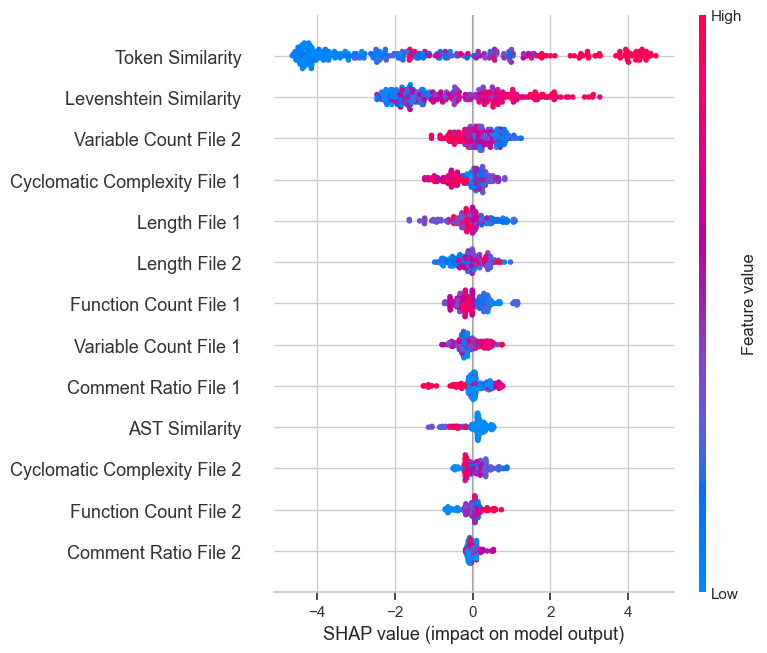

In [33]:
import shap

# Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Use SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot SHAP values
shap.summary_plot(shap_values, X)